In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

employ_df = pd.read_csv("Resources/cleanedstateemployment_monthly.csv")
employ_df.head()

,State,Year,Month,Value,1-Month % Change
0,Alabama,2000,1,4.7,-2.1
1,Alabama,2000,2,4.7,0.0
2,Alabama,2000,3,4.6,-2.1
3,Alabama,2000,4,4.6,0.0
4,Alabama,2000,5,4.5,-2.2


In [3]:
len(employ_df["State"].unique())


51

In [5]:
pollutant_df = pd.read_csv("Resources/cleaned_upollution_2005_2016.csv")
pollutant_df.head()

,State,Sample Year,Sample Month,NO2 Units,Average of NO2 Mean,O3 Units,Average of O3 Mean,SO2 Units,Average of SO2 Mean,CO Units,Average of CO Mean
0,Arizona,2005,1,Parts per billion,22.674850,Parts per million,0.010018,Parts per billion,1.215276,Parts per million,0.661753
1,Arizona,2005,2,Parts per billion,19.542680,Parts per million,0.015479,Parts per billion,0.678611,Parts per million,0.466213
2,Arizona,2005,3,Parts per billion,19.674832,Parts per million,0.024243,Parts per billion,1.245270,Parts per million,0.523486
3,Arizona,2005,4,Parts per billion,21.509326,Parts per million,0.031231,Parts per billion,1.787622,Parts per million,0.605336
4,Arizona,2005,5,Parts per billion,19.719337,Parts per million,0.031362,Parts per billion,2.313748,Parts per million,0.565971


In [6]:
len(pollutant_df["State"].unique())

47

In [8]:
pollutant_df2 = pollutant_df.rename(columns = {"Sample Year": "Year", "Sample Month": "Month"})
pollutant_df2.head()

,State,Year,Month,NO2 Units,Average of NO2 Mean,O3 Units,Average of O3 Mean,SO2 Units,Average of SO2 Mean,CO Units,Average of CO Mean
0,Arizona,2005,1,Parts per billion,22.674850,Parts per million,0.010018,Parts per billion,1.215276,Parts per million,0.661753
1,Arizona,2005,2,Parts per billion,19.542680,Parts per million,0.015479,Parts per billion,0.678611,Parts per million,0.466213
2,Arizona,2005,3,Parts per billion,19.674832,Parts per million,0.024243,Parts per billion,1.245270,Parts per million,0.523486
3,Arizona,2005,4,Parts per billion,21.509326,Parts per million,0.031231,Parts per billion,1.787622,Parts per million,0.605336
4,Arizona,2005,5,Parts per billion,19.719337,Parts per million,0.031362,Parts per billion,2.313748,Parts per million,0.565971


In [9]:
employ_pollutant = pollutant_df2.merge(employ_df, how = "inner")
employ_pollutant_year = employ_pollutant.groupby(["Year"]).mean()
employ_pollutant_year

,Month,Average of NO2 Mean,Average of O3 Mean,Average of SO2 Mean,Average of CO Mean,Value,1-Month % Change
Year,,,,,,,
2005,6.487047,15.707955,0.024888,3.139843,0.426073,5.089119,-0.473575
2006,6.468504,13.773114,0.025567,2.844463,0.376567,4.564173,-0.584252
2007,6.466667,12.507063,0.025739,2.380635,0.348483,4.337895,0.372982
2008,6.531773,11.314656,0.025464,1.871283,0.294194,5.285953,3.387960
2009,6.528428,10.015557,0.025085,1.611979,0.281375,8.462207,2.184615
2010,6.407285,10.433790,0.026983,1.427156,0.294650,8.786424,-0.439073
2011,6.477041,11.178029,0.026745,1.212832,0.282825,8.062755,-0.711224
2012,6.543590,10.516482,0.027545,0.933885,0.284704,7.390256,-0.650769
2013,6.522727,10.160166,0.026451,0.899359,0.260476,6.860606,-1.056818


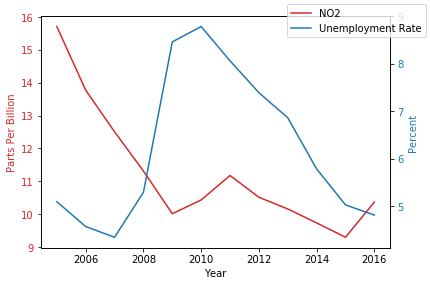

In [10]:


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Parts Per Billion', color=color)
ax1.plot(employ_pollutant_year.index, employ_pollutant_year["Average of NO2 Mean"], color=color, label = "NO2")
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Percent', color=color)
ax2.plot(employ_pollutant_year.index, employ_pollutant_year["Value"], color=color, label = "Unemployment Rate")
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(loc = "upper right")
fig.tight_layout()
plt.show()



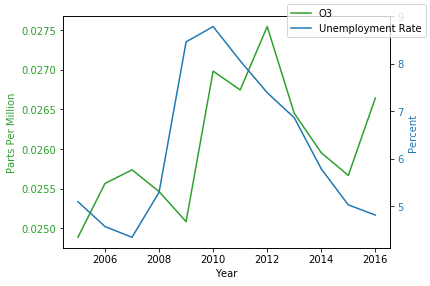

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Year')
ax1.set_ylabel('Parts Per Million', color=color)
ax1.plot(employ_pollutant_year.index, employ_pollutant_year["Average of O3 Mean"], color=color, label = "O3")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Percent', color=color) 
ax2.plot(employ_pollutant_year.index, employ_pollutant_year["Value"], color=color, label = "Unemployment Rate")
ax2.tick_params(axis='y', labelcolor=color)
fig.legend()
fig.tight_layout() 
plt.show()

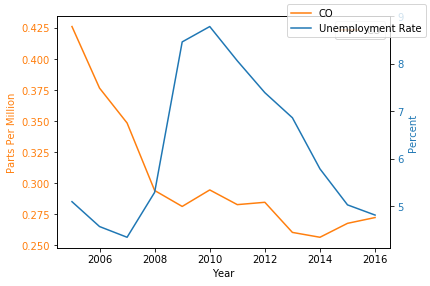

In [12]:

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('Parts Per Million', color=color)
ax1.plot(employ_pollutant_year.index, employ_pollutant_year["Average of CO Mean"], color=color, label = "CO")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()
ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Percent', color=color)  
ax2.plot(employ_pollutant_year.index, employ_pollutant_year["Value"], color=color, label = "Unemployment Rate")
ax2.tick_params(axis='y', labelcolor=color)
fig.legend()
fig.tight_layout()
plt.show()

In [17]:
co2_df = pd.read_csv("Resources/CO2_by_State.csv")
new_header = co2_df.loc[1]
co2_df = co2_df[2:]
co2_df.columns = new_header
co2_df_transposed = co2_df.T
co2_df_transposed.head()

,2,3,4,5,6,7,8,9,10,11,...,50,51,52,53,54,55,56,57,58,59
1,,,,,,,,,,,,,,,,,,,,,
Million metric tons of carbon dioxide,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,West Virginia,Wisconsin,Wyoming,Total of states (unadjusted),Adjustment to match United States,United States total (adjusted state values sum...,Sources: States total (without the discrepancy...,Note: The National-level discrepancy is the d...,The state values that appear in this table hav...,NaN
1990,110,34,63,51,357,66,41,17,4,188,...,103,85,57,"5,054",-15,"5,039",NaN,NaN,NaN,NaN
1991,114,35,64,50,344,67,40,17,4,189,...,95,88,55,"5,011",-17,"4,994",NaN,NaN,NaN,NaN
1992,121,37,67,51,349,68,40,16,4,192,...,97,87,61,"5,093",-1,"5,092",NaN,NaN,NaN,NaN
1993,125,36,69,50,338,72,38,18,5,194,...,98,90,58,"5,199",-16,"5,183",NaN,NaN,NaN,NaN
